In [1]:
import os
import sys
import gc
# assuming data, models, engine in flicc directory:
flicc_path = os.path.realpath("__file__").split('grid_search')[0]
sys.path.append(flicc_path)
import torch
from data import ClimateDataset
from models import ClassificationModel
from engine import Engine

In [2]:
model_checkpoint='gpt2'

In [3]:
results = {'test_acc':[],
           'test_f1':[],
           'eval_acc':[],
           'eval_f1':[],
           'g':[]}

In [4]:
gamma = [2,4,8,16]
lr = 1.0e-4

for g in gamma:
    print(f'Grid search {model_checkpoint}, learning rate {lr}, focal loss gamma {g}')
    data = ClimateDataset(model_to_train=2,model_checkpoint=model_checkpoint,dataset_url=flicc_path,batch_size=32)
    data.setup_dataloaders()
    model = ClassificationModel(model_checkpoint=data.model_checkpoint,num_labels=data.num_labels)
    trainer = Engine(epochs=30,labels=data.labels)
    trainer.model = model.model
    trainer.dataset_encoded = data.dataset_encoded
    test_acc, test_f1, eval_acc, eval_f1 = trainer.run(lr=lr,
                                                       wd=0.0,
                                                       train_dataloader=data.train_dataloader,
                                                       eval_dataloader=data.eval_dataloader,
                                                       test_dataloader=data.test_dataloader,
                                                       focalloss=True,
                                                       gamma=g,
                                                       early_stop=3)
    results['test_acc'].append(test_acc)
    results['test_f1'].append(test_f1)
    results['eval_acc'].append(eval_acc)
    results['eval_f1'].append(eval_f1)
    results['g'].append(g)
    print('### '*10)
    print(results)
    print('### '*10)
    with torch.no_grad():
        torch.cuda.empty_cache()
    del data, model, trainer, test_acc, test_f1, eval_acc, eval_f1
    gc.collect()

Grid search gpt2, learning rate 0.0001, focal loss gamma 2


Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	5.0524	Val Loss:	1.2109	Accuracy:	0.3782	F1:	0.2942
2 / 30: Train Loss:	2.9750	Val Loss:	1.1367	Accuracy:	0.3950	F1:	0.3082
3 / 30: Train Loss:	2.0358	Val Loss:	1.0926	Accuracy:	0.3950	F1:	0.2983
4 / 30: Train Loss:	1.7503	Val Loss:	1.0784	Accuracy:	0.3613	F1:	0.2819
5 / 30: Train Loss:	1.5891	Val Loss:	1.0666	Accuracy:	0.3950	F1:	0.3245
6 / 30: Train Loss:	1.5316	Val Loss:	1.0451	Accuracy:	0.4370	F1:	0.3969
7 / 30: Train Loss:	1.4644	Val Loss:	1.0216	Accuracy:	0.5378	F1:	0.5398
8 / 30: Train Loss:	1.3417	Val Loss:	0.9995	Accuracy:	0.5714	F1:	0.5572
9 / 30: Train Loss:	1.2690	Val Loss:	0.9579	Accuracy:	0.5630	F1:	0.5654
10 / 30: Train Loss:	1.2102	Val Loss:	0.9251	Accuracy:	0.5126	F1:	0.4866
11 / 30: Train Loss:	1.0287	Val Loss:	0.8544	Accuracy:	0.5546	F1:	0.5458
12 / 30: Train Loss:	0.8726	Val Loss:	0.8007	Accuracy:	0.6387	F1:	0.6385
13 / 30: Train Loss:	0.8840	Val Loss:	0.8203	Accuracy:	0.6387	F1:	0.6444
14 / 30: Train Loss:	0.7090	Val Loss:	0.7485	Accuracy:	0.672

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	4.6184	Val Loss:	1.1972	Accuracy:	0.3613	F1:	0.2641
2 / 30: Train Loss:	1.7195	Val Loss:	1.1327	Accuracy:	0.4034	F1:	0.3128
3 / 30: Train Loss:	1.0190	Val Loss:	1.1410	Accuracy:	0.3950	F1:	0.2924
4 / 30: Train Loss:	0.9050	Val Loss:	1.1217	Accuracy:	0.3445	F1:	0.2182
5 / 30: Train Loss:	0.7986	Val Loss:	1.0947	Accuracy:	0.4118	F1:	0.3523
6 / 30: Train Loss:	0.7665	Val Loss:	1.0840	Accuracy:	0.4202	F1:	0.3867
7 / 30: Train Loss:	0.7155	Val Loss:	1.0782	Accuracy:	0.4202	F1:	0.4011
8 / 30: Train Loss:	0.6604	Val Loss:	1.0582	Accuracy:	0.5210	F1:	0.4984
9 / 30: Train Loss:	0.6565	Val Loss:	1.0799	Accuracy:	0.4706	F1:	0.4537
10 / 30: Train Loss:	0.6301	Val Loss:	1.0674	Accuracy:	0.5630	F1:	0.5731
11 / 30: Train Loss:	0.4920	Val Loss:	1.0443	Accuracy:	0.5378	F1:	0.5396
12 / 30: Train Loss:	0.4754	Val Loss:	1.0074	Accuracy:	0.5546	F1:	0.5571
13 / 30: Train Loss:	0.4482	Val Loss:	0.9923	Accuracy:	0.5630	F1:	0.5681
No improvement for 3 epochs. Stopping early.
best (higgest m

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	4.2134	Val Loss:	1.2208	Accuracy:	0.3361	F1:	0.2834
2 / 30: Train Loss:	1.2132	Val Loss:	1.1769	Accuracy:	0.3025	F1:	0.1815
3 / 30: Train Loss:	0.4990	Val Loss:	1.0827	Accuracy:	0.3950	F1:	0.3314
4 / 30: Train Loss:	0.3031	Val Loss:	1.0867	Accuracy:	0.4034	F1:	0.3597
5 / 30: Train Loss:	0.2588	Val Loss:	1.0832	Accuracy:	0.4706	F1:	0.4661
6 / 30: Train Loss:	0.2540	Val Loss:	1.0817	Accuracy:	0.4706	F1:	0.4615
7 / 30: Train Loss:	0.2292	Val Loss:	1.0818	Accuracy:	0.4874	F1:	0.4902
8 / 30: Train Loss:	0.2060	Val Loss:	1.0814	Accuracy:	0.4370	F1:	0.3811
9 / 30: Train Loss:	0.2014	Val Loss:	1.0813	Accuracy:	0.3613	F1:	0.3076
10 / 30: Train Loss:	0.1966	Val Loss:	1.0770	Accuracy:	0.5378	F1:	0.5251
11 / 30: Train Loss:	0.1591	Val Loss:	1.0754	Accuracy:	0.4118	F1:	0.3832
12 / 30: Train Loss:	0.1696	Val Loss:	1.0723	Accuracy:	0.4202	F1:	0.3783
13 / 30: Train Loss:	0.1558	Val Loss:	1.0653	Accuracy:	0.4790	F1:	0.4589
No improvement for 3 epochs. Stopping early.
best (higgest m

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at gpt2 and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


1 / 30: Train Loss:	3.6719	Val Loss:	1.2348	Accuracy:	0.3277	F1:	0.2097
2 / 30: Train Loss:	0.7530	Val Loss:	1.2202	Accuracy:	0.3025	F1:	0.1905
3 / 30: Train Loss:	0.2080	Val Loss:	1.1425	Accuracy:	0.3025	F1:	0.1558
4 / 30: Train Loss:	0.0901	Val Loss:	1.1156	Accuracy:	0.3277	F1:	0.1816
No improvement for 3 epochs. Stopping early.
best (higgest macro f1-score) val results:
                    precision    recall  f1-score   support

 misrepresentation       0.33      0.95      0.49        38
oversimplification       0.50      0.06      0.10        36
slothful induction       0.17      0.02      0.04        45

          accuracy                           0.33       119
         macro avg       0.33      0.34      0.21       119
      weighted avg       0.32      0.33      0.20       119

test results:
                    precision    recall  f1-score   support

 misrepresentation       0.36      0.95      0.52        22
oversimplification       1.00      0.05      0.10        20
slothf

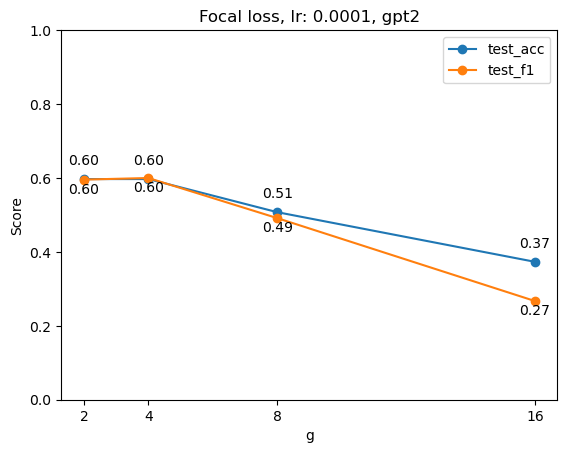

In [5]:
Engine.plot_grid_search(df=results,
                        title=f'Focal loss, lr: {lr}, {model_checkpoint}',
                        column='g',
                        sci_format=False)

In [6]:
%reset -f